In [62]:
#importing the required packages
#please make sure you upgrade the version of nltk in command line in order to use stopwords and wordnet 
import pandas as pd
import nltk 

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/philippeheitzmann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/philippeheitzmann/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
#loading the required data 
wsjdf = pd.read_csv('wsj_article_full_dataset_cleaned2.csv') #WSJ article dataset with cleaned & preprocessed date values 
wsjdf2 = pd.read_csv('allarticles.csv') #WSJ article dataset containing text data for all articles 
spxdf = pd.read_csv('SPXdata.csv') #finance.yahoo.com dataset of S&P price fluctuations and trading volumes

In [64]:
#inspecting our scraped WSJ text data
wsjdf2.head(5)

,Paragraph,Headline,Subheadline,Date,Author,Rubric,Comments#
0,New YorkCeramics—objects made of kiln-fired cl...,‘Masterpieces of French Faience: Selections Fr...,This exhibition of tin-glazed earthenware rela...,1/1/19,NaN,ART REVIEW,1
1,Tribune Media Co. ’s television stations and t...,Tribune Media Pulls Stations From Charter’s Sp...,Contract between the two companies expired at ...,1/2/19,Maria Armental,BUSINESS,1
2,Regarding your editorial “Powell to Markets: T...,The Fed’s Dot Plots Leave Market Watchers No W...,They should not be viewed either like corporat...,1/2/19,NaN,OPINION,1
3,ZurichIt’s difficult not to feel that longevit...,"‘Oskar Kokoschka—Expressionist, Migrant, Europ...",A retrospective urges us to re-examine the Aus...,1/2/19,NaN,ART REVIEW,1
4,"In New York City, museum-going is becoming an ...",Coming Soon to a Museum Near You: The Seven-Da...,"Guggenheim follows in footsteps of MoMA, Whitn...",1/2/19,Charles Passy,U.S.,1


In [35]:
#inspecting our downloaded finance.yahoo.com S&P data
spxdf.describe()

,Open,High,Low,Close,Adj Close,Volume,SPX%Delta
count,383.000000,383.000000,383.000000,383.000000,383.000000,3.830000e+02,383.000000
mean,2942.306008,2959.783024,2923.013215,2943.129993,2943.129993,4.188414e+09,0.036451
std,206.411067,200.210141,212.594849,205.590317,205.590317,1.348177e+09,1.144544
min,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,1.296540e+09,-5.709928
25%,2821.494995,2843.890014,2803.724976,2825.145019,2825.145019,3.353195e+09,-0.272115
50%,2930.939941,2946.520020,2917.560059,2938.090088,2938.090088,3.720450e+09,0.084052
75%,3080.565064,3096.020019,3058.764893,3084.469971,3084.469971,4.644405e+09,0.478342
max,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,9.044690e+09,5.487571


In [65]:
#replacing NaN values in our data
wsjdf = wsjdf.fillna('')
wsjdf2 = wsjdf2.fillna('')
wsjdf2

,Paragraph,Headline,Subheadline,Date,Author,Rubric,Comments#
0,New YorkCeramics—objects made of kiln-fired cl...,‘Masterpieces of French Faience: Selections Fr...,This exhibition of tin-glazed earthenware rela...,1/1/19,,ART REVIEW,1
1,Tribune Media Co. ’s television stations and t...,Tribune Media Pulls Stations From Charter’s Sp...,Contract between the two companies expired at ...,1/2/19,Maria Armental,BUSINESS,1
2,Regarding your editorial “Powell to Markets: T...,The Fed’s Dot Plots Leave Market Watchers No W...,They should not be viewed either like corporat...,1/2/19,,OPINION,1
3,ZurichIt’s difficult not to feel that longevit...,"‘Oskar Kokoschka—Expressionist, Migrant, Europ...",A retrospective urges us to re-examine the Aus...,1/2/19,,ART REVIEW,1
4,"In New York City, museum-going is becoming an ...",Coming Soon to a Museum Near You: The Seven-Da...,"Guggenheim follows in footsteps of MoMA, Whitn...",1/2/19,Charles Passy,U.S.,1
...,...,...,...,...,...,...,...
12324,WASHINGTON—President Trump postponed use of a ...,Trump Moves to Block Pelosi’s Overseas Trip Un...,"Pelosi, along with other lawmakers, was set to...",1/17/19,Rebecca Ballhaus,POLITICS,4790
12325,WASHINGTON—President Trump and his company’s c...,Michael Cohen Details Allegations of Trump’s R...,President’s ex-lawyer tells House committee he...,2/27/19,Rebecca Ballhaus,U.S.,4822
12326,WASHINGTON—The Republican-led Senate acquitted...,Senate Acquits Trump on Both Impeachment Articles,Vote is largely along party lines and falls sh...,2/5/20,Rebecca Ballhaus,POLITICS,5053
12327,As negotiations to end a partial government sh...,"Trump Walks Out of Shutdown Talks, Calls Them ...",Emergency declaration by president to get mone...,1/10/19,Rebecca Ballhaus,POLITICS,5302


In [184]:
#finding indices in our wsjdf that don't contain NaN-like values 
is_not_value_error = wsjdf['Date'] != "#VALUE!"
is_not_zero = wsjdf['Date'] != '1/0/00'
wsjdf = wsjdf[is_not_value_error]
wsjdf = wsjdf[is_not_zero]

In [185]:
#making sure there are no undesirable values in the new 'Date' column of wsjdf
uniquevalues = set(wsjdf['Date'])
uniquevalues = sorted(uniquevalues, reverse = True)
uniquevalues

['7/5/20',
 '7/4/20',
 '7/3/20',
 '7/2/20',
 '7/1/20',
 '6/9/20',
 '6/8/20',
 '6/7/20',
 '6/6/20',
 '6/5/20',
 '6/4/20',
 '6/3/20',
 '6/2/20',
 '6/11/20',
 '6/10/20',
 '6/1/20',
 '5/9/20',
 '5/8/20',
 '5/7/20',
 '5/6/20',
 '5/5/20',
 '5/4/20',
 '5/31/20',
 '5/30/20',
 '5/3/20',
 '5/29/20',
 '5/28/20',
 '5/27/20',
 '5/26/20',
 '5/24/20',
 '5/23/20',
 '5/22/20',
 '5/21/20',
 '5/20/20',
 '5/2/20',
 '5/19/20',
 '5/18/20',
 '5/17/20',
 '5/16/20',
 '5/15/20',
 '5/14/20',
 '5/13/20',
 '5/12/20',
 '5/11/20',
 '5/10/20',
 '5/1/20',
 '4/9/20',
 '4/9/19',
 '4/8/20',
 '4/8/19',
 '4/7/20',
 '4/7/19',
 '4/6/20',
 '4/6/19',
 '4/5/20',
 '4/5/19',
 '4/4/20',
 '4/4/19',
 '4/3/20',
 '4/3/19',
 '4/28/20',
 '4/28/19',
 '4/27/20',
 '4/27/19',
 '4/26/20',
 '4/26/19',
 '4/25/20',
 '4/25/19',
 '4/24/20',
 '4/24/19',
 '4/23/20',
 '4/23/19',
 '4/22/20',
 '4/22/19',
 '4/21/20',
 '4/21/19',
 '4/20/20',
 '4/20/19',
 '4/2/20',
 '4/2/19',
 '4/19/20',
 '4/19/19',
 '4/18/20',
 '4/18/19',
 '4/17/20',
 '4/17/19',
 '4/16/

In [186]:
wsjdf3 = wsjdf.merge(spxdf, how = 'inner', on = 'Date')
wsjdf3

,Paragraph,Headline,Subheadline,Date,Author,Rubric,Comments#,Open,High,Low,Close,Adj Close,Volume,SPX%Delta
0,Millions of Americans take fish-oil supplement...,Fish Oil: Hunting for Evidence to Tip the Scales,"As debate continues, studies explore whether f...",1/2/19,Betsy McKay,LIFE & ARTS,94,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,1.335107
1,The world has never had as much debt as it has...,Taking Stock of the World’s Debt,Growing debt goes hand-in-hand with growing ec...,1/2/19,Aaron Kuriloff,MARKETS,158,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,1.335107
2,"Spencer Neumann, who on Wednesday was named Ne...",New Netflix CFO to Tackle Cash Flow Conundrum,Spencer Neumann must convince investors that N...,1/2/19,Tatyana Shumsky,CFO JOURNAL,14,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,1.335107
3,The New York City public advocate’s seat is of...,Running for New York City Public Advocate? Cre...,More than two dozen people have announced thei...,1/2/19,Katie Honan,U.S.,4,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,1.335107
4,Allergan PLC has raised prices on 24 products ...,Corrections & Amplifications,,1/2/19,,CORRECTIONS,,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,1.335107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19066,Uber Technologies Inc. moved its target valuat...,Uber Outlines First-Quarter Results After Cutt...,Ride-hailing firm lost roughly $1 billion in f...,4/26/19,Corrie Driebusch,MARKETS,,2925.810059,2939.879883,2917.560059,2939.879883,2939.879883,3248500000,0.480886
19067,Renault SA wants to propose a merger with Niss...,Renault Merger Plan for Nissan Triggers New Te...,"Under the proposal, Nissan shareholders and Re...",4/26/19,Sean McLain,BUSINESS,,2925.810059,2939.879883,2917.560059,2939.879883,2939.879883,3248500000,0.480886
19068,WASHINGTON—The Democratic presidential field i...,Democratic 2020 Field Is Set. Next Question: H...,Biden’s entry exacerbates intraparty debates o...,4/26/19,Ken Thomas,POLITICS,408,2925.810059,2939.879883,2917.560059,2939.879883,2939.879883,3248500000,0.480886
19069,BEIJING—Chinese President Xi Jinping signaled ...,China’s Xi Vows New Direction for ‘Belt and Ro...,Xi pledges to ensure financial sustainability ...,4/26/19,Chun Han Wong,WORLD,,2925.810059,2939.879883,2917.560059,2939.879883,2939.879883,3248500000,0.480886


In [195]:
#grouping the paragraph text data by date 
import xlsxwriter
fun = lambda a : " ".join(a)
wsjdfparagraph2 = wsjdf.groupby(['Date'])['Paragraph'].apply(fun).reset_index() #grouping wsjdf paragraph data by date and concatenating same-day values
wsjdfparagraph3 = wsjdfparagraph2.merge(spxdf, how = 'inner', on = 'Date') #merging with spxdf 
wsjdfparagraph3 = wsjdfparagraph3.fillna('')
wsjdfparagraph3.to_excel('sort this dataframe by date2.xlsx', encoding='utf8') #outputting the dataset to excel to more easily clean date values and sort by chronological order 

In [203]:
wsjdfparagraph4 = pd.read_excel('sort this dataframe by date3.xlsx') #reading in the cleaned dataset
fun1 = lambda x: x.lower()
fun3 = lambda x : re.sub('[^\w\s]', '', x)
wsjdfparagraph4['Paragraph'] = wsjdfparagraph4['Paragraph'].apply(fun1)  #making all text data lowercase 
wsjdfparagraph4['Paragraph'] = wsjdfparagraph4['Paragraph'].apply(fun3)  
#filtering for the defined stop words
wsjdfparagraph4['Paragraph'] = wsjdfparagraph4['Paragraph'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
#lemmatizing the Paragraph column 
wsjdfparagraph4['Paragraph'] = wsjdfparagraph4['Paragraph'].apply(lambda x : " ".join(lemztr.lemmatize(i) for i in x.split()))
#generating the VADER scores on the spx dataset
wsjdfparagraph4['scores'] = wsjdfparagraph4['Paragraph'].apply(lambda x : sid.polarity_scores(x))
#separating the VADER negativity, positivity, neutrality and compound scores in the full dataset
wsjdfparagraph4['negative'] = wsjdfparagraph4['scores'].apply(lambda score_dict: score_dict['neg'])
wsjdfparagraph4['positive'] = wsjdfparagraph4['scores'].apply(lambda score_dict: score_dict['pos'])
wsjdfparagraph4['neutral'] = wsjdfparagraph4['scores'].apply(lambda score_dict: score_dict['neu'])
wsjdfparagraph4['compound'] = wsjdfparagraph4['scores'].apply(lambda score_dict: score_dict['compound'])
#generating the TextBlob scores
wsjdfparagraph4['ParaSentiment'] = wsjdfparagraph4['Paragraph'].apply(lambda x: TextBlob(x).sentiment)
#separating the two TextBlob polarity and subjectivity scores for Paragraph and Headline 
wsjdfparagraph4['para_sentiment_a'], wsjdfparagraph4['para_sentiment_b'] = wsjdfparagraph4.ParaSentiment.str


/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Columnar iteration over characters will be deprecated in future releases.


In [208]:
#renaming the columns
wsjdfparagraph4.columns = ['Unnamed: 0', 'Date', 'Paragraph', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'SPX%Delta', 'SPX%Delta1', 'scores', 'negative',
       'positive', 'neutral', 'compound', 'ParaSentiment', 'polarity',
       'subjectivity']

In [209]:
#creating OLS regression using statsmodels API
import statsmodels.api as sm
X1 = sm.add_constant(wsjdfparagraph4[['polarity','subjectivity','negative','positive', 'neutral', 'compound']])
est = sm.OLS(wsjdfparagraph4['SPX%Delta1'], X1).fit()
# summarize our model
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SPX%Delta1   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.190
Date:                Mon, 21 Sep 2020   Prob (F-statistic):              0.315
Time:                        14:22:44   Log-Likelihood:                -218.33
No. Observations:                 150   AIC:                             450.7
Df Residuals:                     143   BIC:                             471.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          179.6552    189.311      0.949      0.344    -194.554     553.865
polarity        -4.3239      5.158     -0.838      0.403     -14.521       5.873
subjectivity     4.1781      3.601      1.160      0.248      -2.940      11.296
negative      -173.9635    189.780     -0.917      0.361    -549.099     201.172
positive      -189.2314    189.312     -1.000      0.319    -563.442     184.980
neutral       -180.7332    189.233     -0.955      0.341    -554.788     193.322
compound         0.3607      0.163      2.215      0.028       0.039       0.683
==============================================================================
Omnibus:                       28.868   Durbin-Watson:                   2.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.146
Skew:                          -0.788   Prob(JB):                     1.59e-15
Kurtosis:                       5.902   Cond. No.                     6.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#making all characters lowercase in the paragraph and headline columns of the wsjdf2 dataset
fun1 = lambda x: x.lower()
wsjdf2['Paragraph'] = wsjdf2['Paragraph'].apply(fun1)
wsjdf2['Headline '] = wsjdf2['Headline '].apply(fun1)
wsjdf2

,Paragraph,Headline,Subheadline,Date,Author,Rubric,Comments#
0,new yorkceramics—objects made of kiln-fired cl...,‘masterpieces of french faience: selections fr...,This exhibition of tin-glazed earthenware rela...,1/1/19,,ART REVIEW,1
1,tribune media co. ’s television stations and t...,tribune media pulls stations from charter’s sp...,Contract between the two companies expired at ...,1/2/19,Maria Armental,BUSINESS,1
2,regarding your editorial “powell to markets: t...,the fed’s dot plots leave market watchers no w...,They should not be viewed either like corporat...,1/2/19,,OPINION,1
3,zurichit’s difficult not to feel that longevit...,"‘oskar kokoschka—expressionist, migrant, europ...",A retrospective urges us to re-examine the Aus...,1/2/19,,ART REVIEW,1
4,"in new york city, museum-going is becoming an ...",coming soon to a museum near you: the seven-da...,"Guggenheim follows in footsteps of MoMA, Whitn...",1/2/19,Charles Passy,U.S.,1
...,...,...,...,...,...,...,...
12324,washington—president trump postponed use of a ...,trump moves to block pelosi’s overseas trip un...,"Pelosi, along with other lawmakers, was set to...",1/17/19,Rebecca Ballhaus,POLITICS,4790
12325,washington—president trump and his company’s c...,michael cohen details allegations of trump’s r...,President’s ex-lawyer tells House committee he...,2/27/19,Rebecca Ballhaus,U.S.,4822
12326,washington—the republican-led senate acquitted...,senate acquits trump on both impeachment articles,Vote is largely along party lines and falls sh...,2/5/20,Rebecca Ballhaus,POLITICS,5053
12327,as negotiations to end a partial government sh...,"trump walks out of shutdown talks, calls them ...",Emergency declaration by president to get mone...,1/10/19,Rebecca Ballhaus,POLITICS,5302


In [72]:
#making sure all multiple spaces are replaced with only one space 
import re

fun2 = (lambda x : re.sub('\s+', ' ', x))
wsjdf2['Paragraph'] = wsjdf2['Paragraph'].apply(fun2)
wsjdf2['Headline '] = wsjdf2['Headline '].apply(fun2)
wsjdf2.sample(10)

,Paragraph,Headline,Subheadline,Date,Author,Rubric,Comments#
7447,washington—u.s. tariffs against china triggere...,u.s. trade gap lowest in three years as import...,Imports fell 1% in November following U.S. tar...,1/7/20,Harriet Torry,ECONOMY,50
3089,he is one of the country’s foremost evangelist...,chef sean brock will open a sprawling temple t...,"After two years of soul-searching, the king of...",1/24/19,,FOOD,8
2980,new york city’s office landlords are strugglin...,two big new york city landlords highlight rent...,Reports by SL Green and Empire State provide c...,4/28/20,Peter Grant,REAL ESTATE,7
1532,"here are winners of the golden globes, from th...",golden globe winners,Here is the list of winners of the Golden Glob...,1/6/20,,ARTS,3
12238,the report that john bolton’s book draft impli...,the john bolton report,The former NSC adviser should tell the public ...,1/27/20,The Editorial Board,OPINION,1883
7061,the department store transformed america. now ...,the department store of the future will look a...,Department stores were once the cutting edge o...,1/17/20,Justin Lahart,MARKETS,43
1742,i take issue with your editorial “trade defici...,the trade deficits of old financed more invest...,Trade deficits today tend to fund consumption ...,3/15/19,,OPINION,3
7423,democratic lawmakers in connecticut introduced...,connecticut democrats propose public health-in...,Industry representatives fear legislation woul...,3/7/19,Joseph De Avila,U.S.,49
925,ralph lauren skipped the runway this week. on ...,why ralph lauren served up fashion with coffee,"The brand, aiming for a younger customer, stag...",2/8/19,Ray A. Smith,BUSINESS,2
5055,"every employer is in the health care business,...",the hidden costs of stressed-out workers,Companies often don’t realize how much they pa...,2/28/19,,LIFE & ARTS,19


In [73]:
#filtering
fun3 = lambda x : re.sub('[^\w\s]', '', x)
wsjdf2['Paragraph'] = wsjdf2['Paragraph'].apply(fun3)    #applying filtering to the Paragraph column
wsjdf2['Headline '] = wsjdf2['Headline '].apply(fun3)    #applying filtering to the Headline column
wsjdf2.sample(10)
wsjdf2.shape

(12329, 7)

In [37]:
#importing the stopwords corpus 
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [74]:
#importing the WordNetLemmatizer library from the nltk package
from nltk import WordNetLemmatizer
lemztr = WordNetLemmatizer()
#removing stopwords from the Paragraph and Headline columns 
wsjdf2['Paragraph'] = wsjdf2['Paragraph'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
wsjdf2['Headline '] = wsjdf2['Headline '].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
#lemmatizing the Paragraph and Headline columns 
wsjdf2['Paragraph'] = wsjdf2['Paragraph'].apply(lambda x : " ".join(lemztr.lemmatize(i) for i in x.split()))
wsjdf2['Headline '] = wsjdf2['Headline '].apply(lambda x : " ".join(lemztr.lemmatize(i) for i in x.split()))
wsjdf2.sample(10)

,Paragraph,Headline,Subheadline,Date,Author,Rubric,Comments#
0,new yorkceramicsobjects made kilnfired claycon...,masterpieces french faience selections sidney ...,This exhibition of tin-glazed earthenware rela...,1/1/19,,ART REVIEW,1
1,tribune media co television stations wgn ameri...,tribune media pulls stations charters spectrum...,Contract between the two companies expired at ...,1/2/19,Maria Armental,BUSINESS,1
2,regarding editorial powell markets take dec 20...,feds dot plots leave market watchers wiser,They should not be viewed either like corporat...,1/2/19,,OPINION,1
3,zurichits difficult feel longevity curse oskar...,oskar kokoschkaexpressionist migrant european ...,A retrospective urges us to re-examine the Aus...,1/2/19,,ART REVIEW,1
4,new york city museumgoing becoming everyday af...,coming soon museum near sevenday schedule,"Guggenheim follows in footsteps of MoMA, Whitn...",1/2/19,Charles Passy,U.S.,1
...,...,...,...,...,...,...,...
12324,washingtonpresident trump postponed use milita...,trump moves block pelosis overseas trip shutdown,"Pelosi, along with other lawmakers, was set to...",1/17/19,Rebecca Ballhaus,POLITICS,4790
12325,washingtonpresident trump companys chief finan...,michael cohen details allegations trumps role ...,President’s ex-lawyer tells House committee he...,2/27/19,Rebecca Ballhaus,U.S.,4822
12326,washingtonthe republicanled senate acquitted p...,senate acquits trump impeachment articles,Vote is largely along party lines and falls sh...,2/5/20,Rebecca Ballhaus,POLITICS,5053
12327,negotiations end partial government shutdown b...,trump walks shutdown talks calls total waste time,Emergency declaration by president to get mone...,1/10/19,Rebecca Ballhaus,POLITICS,5302


In [78]:
#creating TextBlob positivity and subjectivity scores for our wsjdf2 data data 
from textblob import TextBlob
#creating the polarity and subjectivity scores 
wsjdf2['ParaSentiment'] = wsjdf2['Paragraph'].apply(lambda x: TextBlob(x).sentiment)
wsjdf2['HeadlineSentiment'] = wsjdf2['Headline '].apply(lambda x: TextBlob(x).sentiment)
#separating the two TextBlob polarity and subjectivity scores for Paragraph and Headline 
wsjdf2['para_sentiment_a'], wsjdf2['para_sentiment_b'] = wsjdf2.ParaSentiment.str
wsjdf2['head_sentiment_a'], wsjdf2['head_sentiment_b'] = wsjdf2.HeadlineSentiment.str
wsjdf2

/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  import sys
/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


,Paragraph,Headline,Subheadline,Date,Author,Rubric,Comments#,ParaSentiment,HeadlineSentiment,para_sentiment_a,para_sentiment_b,head_sentiment_a,head_sentiment_b
0,new yorkceramicsobjects made kilnfired claycon...,masterpiece french faience selection sidney r ...,This exhibition of tin-glazed earthenware rela...,1/1/19,,ART REVIEW,1,"(0.14733277475212958, 0.4202119117441699)","(0.25, 0.25)",0.147333,0.420212,0.25,0.250
1,tribune medium co television station wgn ameri...,tribune medium pull station charter spectrum s...,Contract between the two companies expired at ...,1/2/19,Maria Armental,BUSINESS,1,"(-0.018452380952380956, 0.4)","(0.0, 0.0)",-0.018452,0.400000,0.00,0.000
2,regarding editorial powell market take dec 20 ...,fed dot plot leave market watcher wiser,They should not be viewed either like corporat...,1/2/19,,OPINION,1,"(-0.00708382526564345, 0.3763872491145218)","(0.0, 0.0)",-0.007084,0.376387,0.00,0.000
3,zurichits difficult feel longevity curse oskar...,oskar kokoschkaexpressionist migrant european ...,A retrospective urges us to re-examine the Aus...,1/2/19,,ART REVIEW,1,"(0.16162159758050168, 0.5157608373361797)","(0.0, 0.0)",0.161622,0.515761,0.00,0.000
4,new york city museumgoing becoming everyday af...,coming soon museum near sevenday schedule,"Guggenheim follows in footsteps of MoMA, Whitn...",1/2/19,Charles Passy,U.S.,1,"(0.05185253152644457, 0.4478486730660644)","(0.1, 0.4)",0.051853,0.447849,0.10,0.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,washingtonpresident trump postponed use milita...,trump move block pelosis overseas trip shutdown,"Pelosi, along with other lawmakers, was set to...",1/17/19,Rebecca Ballhaus,POLITICS,4790,"(0.014952380952380953, 0.30253968253968255)","(0.0, 0.0)",0.014952,0.302540,0.00,0.000
12325,washingtonpresident trump company chief financ...,michael cohen detail allegation trump role hus...,President’s ex-lawyer tells House committee he...,2/27/19,Rebecca Ballhaus,U.S.,4822,"(-0.01149753347427766, 0.351032417195208)","(0.0, 0.0)",-0.011498,0.351032,0.00,0.000
12326,washingtonthe republicanled senate acquitted p...,senate acquits trump impeachment article,Vote is largely along party lines and falls sh...,2/5/20,Rebecca Ballhaus,POLITICS,5053,"(0.042221191506905786, 0.39963422490208195)","(0.0, 0.0)",0.042221,0.399634,0.00,0.000
12327,negotiation end partial government shutdown br...,trump walk shutdown talk call total waste time,Emergency declaration by president to get mone...,1/10/19,Rebecca Ballhaus,POLITICS,5302,"(0.015104166666666663, 0.31473214285714285)","(-0.1, 0.375)",0.015104,0.314732,-0.10,0.375


In [ ]:
#defining outliers by looking at the interquartile range 
import numpy as np
from scipy.stats import iqr
iqr(wsjdf2['Comments#'])
iqr(filter5['Comments#'])
q75, q25 = np.percentile(filter5['Comments#'], [75 ,25])
iqr = q75 - q25
iqr*1.5 + q75

In [131]:
#creating two filtered dataframes, filter5 comprising only observations with >5 comments, filter 6 with >5 & < 386 comments (>386 = outliers)
filter5 = wsjdf2.loc[wsjdf2['Comments#'] > 5] #filtering 
filter5
filter6 = wsjdf2.loc[(wsjdf2['Comments#'] > 5) & (wsjdf2['Comments#'] < 386)] 
filter6

,Paragraph,Headline,Subheadline,Date,Author,Rubric,Comments#,ParaSentiment,HeadlineSentiment,para_sentiment_a,para_sentiment_b,head_sentiment_a,head_sentiment_b
2497,angela rocco decarlos oped merry christmas cor...,capra beat coppola immigrant value,He made movies about ordinary nobodies from ev...,1/1/19,,OPINION,6,"(0.24111752445085777, 0.36886323552990213)","(0.0, 0.0)",0.241118,0.368863,0.000,0.000000
2498,always bring new lego kit im going somewhere w...,comedian paul scheer interactive way watch bas...,The host of the ‘How Did This Get Made’ podcas...,1/2/19,,TECH,6,"(0.144952604866398, 0.4026197939991043)","(0.0, 0.0)",0.144953,0.402620,0.000,0.000000
2499,activist hedgefund firm third point llc lost 1...,daniel loeb 11 loss 2018 worst since 2008 crisis,"His firm, Third Point, takes positions in comp...",1/3/19,Rachael Levy,MARKETS,6,"(-0.026719576719576723, 0.3734126984126984)","(-1.0, 1.0)",-0.026720,0.373413,-1.000,1.000000
2500,beijingchina stepped effort boost lending flag...,china move ramp lending small business,Leadership moves to address weak link in econo...,1/4/19,,WORLD,6,"(-0.014304812834224592, 0.325650623885918)","(-0.25, 0.4)",-0.014305,0.325651,-0.250,0.400000
2501,general motor co selfdriving car unit cruise d...,gm doordash test autonomous food delivery,Restaurant-meal program expands push to build ...,1/4/19,Mike Colias,BUSINESS,6,"(0.23227901131126943, 0.505138947074431)","(0.4, 0.7)",0.232279,0.505139,0.400,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11070,washingtonrod rosenstein deputy attorney gener...,deputy attorney general rod rosenstein expecte...,"No signs Rosenstein, who has weathered critici...",1/9/19,Sadie Gurman,POLITICS,383,"(0.08476620768789443, 0.3986278079350369)","(-0.024999999999999994, 0.45)",0.084766,0.398628,-0.025,0.450000
11071,washingtonvermont sen bernie sander campaign s...,bernie sander raise 59 million online first 24...,Vermont independent senator receives money fro...,2/20/19,Ken Thomas,POLITICS,383,"(0.0837962962962963, 0.3604938271604939)","(0.25, 0.3333333333333333)",0.083796,0.360494,0.250,0.333333
11072,stock buyback latest bipartisan piñata whacked...,stock buyback panic,Repurchases reallocate under-utilized capital ...,3/10/19,The Editorial Board,OPINION,385,"(0.08278882575757576, 0.4091596771284271)","(0.0, 0.0)",0.082789,0.409160,0.000,0.000000
11073,imagine two decade ago even one 37yearold open...,pete buttigieg tell u changing time,"Young, openly gay military veteran—a potential...",4/8/19,Gerald F. Seib,POLITICS,385,"(0.15885281385281383, 0.3490388579674293)","(0.0, 0.0)",0.158853,0.349039,0.000,0.000000


In [95]:
#applying GradientBoostingRegressor in filter6 df 
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
gbr5 = GradientBoostingRegressor()
gbr5.fit(filter6[['para_sentiment_a','para_sentiment_b','head_sentiment_a','head_sentiment_b']],filter6['Comments#'])
gbr5.score(filter6[['para_sentiment_a','para_sentiment_b','head_sentiment_a','head_sentiment_b']],filter6['Comments#'])

0.07211318443774994

In [98]:
#low scores using GBR
from sklearn.model_selection import train_test_split
target1 = filter6['Comments#']
xdata = filter6[['para_sentiment_a','para_sentiment_b','head_sentiment_a','head_sentiment_b']]
x_train, x_test, y_train, y_test = train_test_split(xdata, target1, test_size = 0.33)
gbr5.fit(x_train, y_train)
gbr5.score(x_test, y_test)

-0.005772486611722805

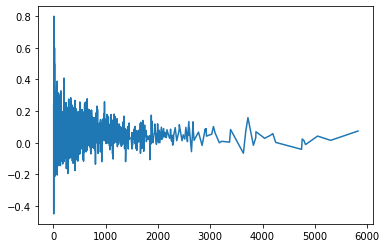

In [84]:
#visualizing the filter5 data with polarity score 
import matplotlib.pyplot as plt
plt.plot(filter5['Comments#'],filter5['para_sentiment_a'])

<AxesSubplot:xlabel='Comments#', ylabel='para_sentiment_a'>

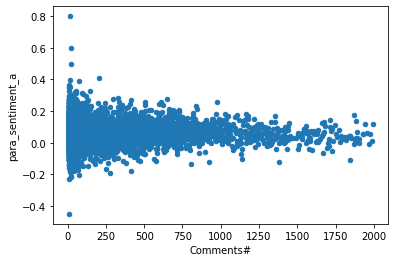

In [90]:
#visualizing the filter6 data with polarity score 
filter6.plot.scatter('Comments#','para_sentiment_a')

In [94]:
import sklearn
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(filter6[['para_sentiment_a','para_sentiment_b','head_sentiment_a','head_sentiment_b']],filter6['Comments#'])
lm1.score(filter6[['para_sentiment_a','para_sentiment_b','head_sentiment_a','head_sentiment_b']],filter6['Comments#'])

0.005854105337529503

Text(0.5, 1.0, 'Boxpot of Number of comments')

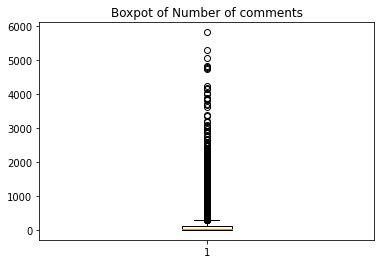

In [121]:
#visualizing using box plot distribution of comments variable
plt.boxplot(wsjdf2['Comments#'])
plt.title('Boxpot of Number of comments')

Text(0.5, 1.0, 'Distribution of Number of comments')

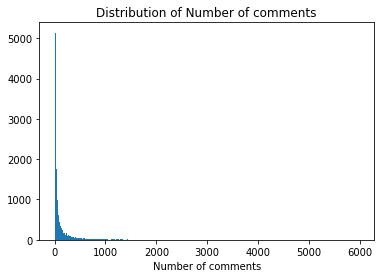

In [119]:
#visualizing using bar graph distribution of comments variable
bin_list = list(range(0,6000,20))
plt.hist(wsjdf2['Comments#'], bins = bin_list )
plt.xlabel('Number of comments')
plt.title('Distribution of Number of comments')

In [139]:
#creating the filtered dataframe, removing <5 comment observations & outliers 
filtereddf = wsjdf2.loc[(wsjdf2['Comments#'] > 5) & (wsjdf2['Comments#'] < 386)]
filtereddf

,Paragraph,Headline,Subheadline,Date,Author,Rubric,Comments#,ParaSentiment,HeadlineSentiment,para_sentiment_a,para_sentiment_b,head_sentiment_a,head_sentiment_b
2497,angela rocco decarlos oped merry christmas cor...,capra beat coppola immigrant value,He made movies about ordinary nobodies from ev...,1/1/19,,OPINION,6,"(0.24111752445085777, 0.36886323552990213)","(0.0, 0.0)",0.241118,0.368863,0.000,0.000000
2498,always bring new lego kit im going somewhere w...,comedian paul scheer interactive way watch bas...,The host of the ‘How Did This Get Made’ podcas...,1/2/19,,TECH,6,"(0.144952604866398, 0.4026197939991043)","(0.0, 0.0)",0.144953,0.402620,0.000,0.000000
2499,activist hedgefund firm third point llc lost 1...,daniel loeb 11 loss 2018 worst since 2008 crisis,"His firm, Third Point, takes positions in comp...",1/3/19,Rachael Levy,MARKETS,6,"(-0.026719576719576723, 0.3734126984126984)","(-1.0, 1.0)",-0.026720,0.373413,-1.000,1.000000
2500,beijingchina stepped effort boost lending flag...,china move ramp lending small business,Leadership moves to address weak link in econo...,1/4/19,,WORLD,6,"(-0.014304812834224592, 0.325650623885918)","(-0.25, 0.4)",-0.014305,0.325651,-0.250,0.400000
2501,general motor co selfdriving car unit cruise d...,gm doordash test autonomous food delivery,Restaurant-meal program expands push to build ...,1/4/19,Mike Colias,BUSINESS,6,"(0.23227901131126943, 0.505138947074431)","(0.4, 0.7)",0.232279,0.505139,0.400,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11070,washingtonrod rosenstein deputy attorney gener...,deputy attorney general rod rosenstein expecte...,"No signs Rosenstein, who has weathered critici...",1/9/19,Sadie Gurman,POLITICS,383,"(0.08476620768789443, 0.3986278079350369)","(-0.024999999999999994, 0.45)",0.084766,0.398628,-0.025,0.450000
11071,washingtonvermont sen bernie sander campaign s...,bernie sander raise 59 million online first 24...,Vermont independent senator receives money fro...,2/20/19,Ken Thomas,POLITICS,383,"(0.0837962962962963, 0.3604938271604939)","(0.25, 0.3333333333333333)",0.083796,0.360494,0.250,0.333333
11072,stock buyback latest bipartisan piñata whacked...,stock buyback panic,Repurchases reallocate under-utilized capital ...,3/10/19,The Editorial Board,OPINION,385,"(0.08278882575757576, 0.4091596771284271)","(0.0, 0.0)",0.082789,0.409160,0.000,0.000000
11073,imagine two decade ago even one 37yearold open...,pete buttigieg tell u changing time,"Young, openly gay military veteran—a potential...",4/8/19,Gerald F. Seib,POLITICS,385,"(0.15885281385281383, 0.3490388579674293)","(0.0, 0.0)",0.158853,0.349039,0.000,0.000000


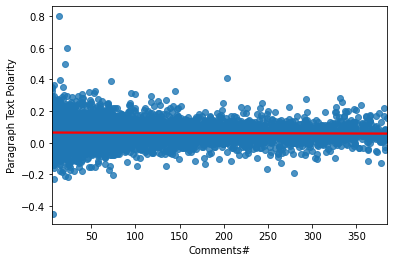

In [145]:
#using seaborn to visualize Comments # vs Paragraph Text Polarity
import seaborn as sns
ax = sns.regplot(x=filtereddf['Comments#'],y=filtereddf['para_sentiment_a'],data=filtereddf, fit_reg=True, line_kws={"color": "red"}) 
ax.set(xlabel='Comments#', ylabel='Paragraph Text Polarity') 
plt.show()

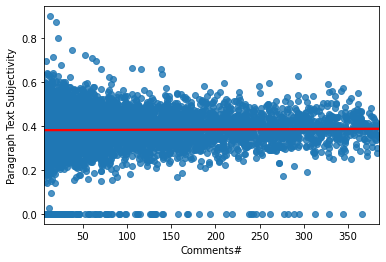

In [146]:
#using seaborn to visualize Comments # vs Paragraph Text Subjectivity
import seaborn as sns
ax = sns.regplot(x=filtereddf['Comments#'],y=filtereddf['para_sentiment_b'],data=filtereddf, fit_reg=True, line_kws={"color": "red"}) 
ax.set(xlabel='Comments#', ylabel='Paragraph Text Subjectivity') 
plt.show()

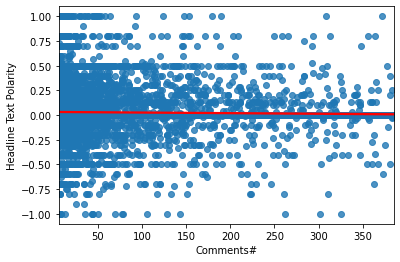

In [147]:
#using seaborn to visualize Comments # vs Headline Text Polarity
import seaborn as sns
ax = sns.regplot(x=filtereddf['Comments#'],y=filtereddf['head_sentiment_a'],data=filtereddf, fit_reg=True, line_kws={"color": "red"}) 
ax.set(xlabel='Comments#', ylabel='Headline Text Polarity') 
plt.show()

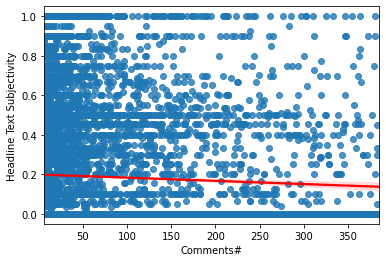

In [148]:
#using seaborn to visualize Comments # vs Headline Text Subjectivity
import seaborn as sns
ax = sns.regplot(x=filtereddf['Comments#'],y=filtereddf['head_sentiment_b'],data=filtereddf, fit_reg=True, line_kws={"color": "red"}) 
ax.set(xlabel='Comments#', ylabel='Headline Text Subjectivity') 
plt.show()

In [120]:
#loading VADER library
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/philippeheitzmann/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [152]:
#generating the VADER scores on the full wsjdf2 dataset
wsjdf2['scores'] = wsjdf2['Paragraph'].apply(lambda x : sid.polarity_scores(x))
#separating the VADER negativity, positivity, neutrality and compound scores in the full dataset
wsjdf2['negative'] = wsjdf2['scores'].apply(lambda score_dict: score_dict['neg'])
wsjdf2['positive'] = wsjdf2['scores'].apply(lambda score_dict: score_dict['pos'])
wsjdf2['neutral'] = wsjdf2['scores'].apply(lambda score_dict: score_dict['neu'])
wsjdf2['compound'] = wsjdf2['scores'].apply(lambda score_dict: score_dict['compound'])

In [158]:
#generating the VADER scores on the filtered dataset
filtereddf['scores'] = filtereddf['Paragraph'].apply(lambda x : sid.polarity_scores(x))

/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [159]:
#separating the VADER negativity, positivity, neutrality and compound scores in the filtered dataset
filtereddf['negative'] = filtereddf['scores'].apply(lambda score_dict: score_dict['neg'])
filtereddf['positive'] = filtereddf['scores'].apply(lambda score_dict: score_dict['pos'])
filtereddf['neutral'] = filtereddf['scores'].apply(lambda score_dict: score_dict['neu'])
filtereddf['compound'] = filtereddf['scores'].apply(lambda score_dict: score_dict['compound'])
filtereddf

/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,Paragraph,Headline,Subheadline,Date,Author,Rubric,Comments#,ParaSentiment,HeadlineSentiment,para_sentiment_a,para_sentiment_b,head_sentiment_a,head_sentiment_b,scores,negative,positive,neutral,compound
2497,angela rocco decarlos oped merry christmas cor...,capra beat coppola immigrant value,He made movies about ordinary nobodies from ev...,1/1/19,,OPINION,6,"(0.24111752445085777, 0.36886323552990213)","(0.0, 0.0)",0.241118,0.368863,0.000,0.000000,"{'neg': 0.103, 'neu': 0.594, 'pos': 0.303, 'co...",0.103,0.303,0.594,0.9904
2498,always bring new lego kit im going somewhere w...,comedian paul scheer interactive way watch bas...,The host of the ‘How Did This Get Made’ podcas...,1/2/19,,TECH,6,"(0.144952604866398, 0.4026197939991043)","(0.0, 0.0)",0.144953,0.402620,0.000,0.000000,"{'neg': 0.056, 'neu': 0.765, 'pos': 0.179, 'co...",0.056,0.179,0.765,0.9808
2499,activist hedgefund firm third point llc lost 1...,daniel loeb 11 loss 2018 worst since 2008 crisis,"His firm, Third Point, takes positions in comp...",1/3/19,Rachael Levy,MARKETS,6,"(-0.026719576719576723, 0.3734126984126984)","(-1.0, 1.0)",-0.026720,0.373413,-1.000,1.000000,"{'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'co...",0.138,0.065,0.797,-0.9413
2500,beijingchina stepped effort boost lending flag...,china move ramp lending small business,Leadership moves to address weak link in econo...,1/4/19,,WORLD,6,"(-0.014304812834224592, 0.325650623885918)","(-0.25, 0.4)",-0.014305,0.325651,-0.250,0.400000,"{'neg': 0.103, 'neu': 0.773, 'pos': 0.124, 'co...",0.103,0.124,0.773,0.9370
2501,general motor co selfdriving car unit cruise d...,gm doordash test autonomous food delivery,Restaurant-meal program expands push to build ...,1/4/19,Mike Colias,BUSINESS,6,"(0.23227901131126943, 0.505138947074431)","(0.4, 0.7)",0.232279,0.505139,0.400,0.700000,"{'neg': 0.003, 'neu': 0.855, 'pos': 0.142, 'co...",0.003,0.142,0.855,0.9936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11070,washingtonrod rosenstein deputy attorney gener...,deputy attorney general rod rosenstein expecte...,"No signs Rosenstein, who has weathered critici...",1/9/19,Sadie Gurman,POLITICS,383,"(0.08476620768789443, 0.3986278079350369)","(-0.024999999999999994, 0.45)",0.084766,0.398628,-0.025,0.450000,"{'neg': 0.089, 'neu': 0.755, 'pos': 0.156, 'co...",0.089,0.156,0.755,0.9922
11071,washingtonvermont sen bernie sander campaign s...,bernie sander raise 59 million online first 24...,Vermont independent senator receives money fro...,2/20/19,Ken Thomas,POLITICS,383,"(0.0837962962962963, 0.3604938271604939)","(0.25, 0.3333333333333333)",0.083796,0.360494,0.250,0.333333,"{'neg': 0.0, 'neu': 0.947, 'pos': 0.053, 'comp...",0.000,0.053,0.947,0.8225
11072,stock buyback latest bipartisan piñata whacked...,stock buyback panic,Repurchases reallocate under-utilized capital ...,3/10/19,The Editorial Board,OPINION,385,"(0.08278882575757576, 0.4091596771284271)","(0.0, 0.0)",0.082789,0.409160,0.000,0.000000,"{'neg': 0.088, 'neu': 0.739, 'pos': 0.174, 'co...",0.088,0.174,0.739,0.9907
11073,imagine two decade ago even one 37yearold open...,pete buttigieg tell u changing time,"Young, openly gay military veteran—a potential...",4/8/19,Gerald F. Seib,POLITICS,385,"(0.15885281385281383, 0.3490388579674293)","(0.0, 0.0)",0.158853,0.349039,0.000,0.000000,"{'neg': 0.094, 'neu': 0.785, 'pos': 0.121, 'co...",0.094,0.121,0.785,0.8396


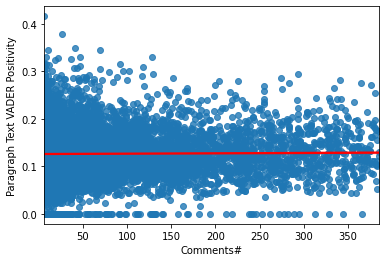

In [160]:
#using seaborn to visualize Comments # vs VADER Positivity
import seaborn as sns
ax = sns.regplot(x=filtereddf['Comments#'],y=filtereddf['positive'],data=filtereddf, fit_reg=True, line_kws={"color": "red"}) 
ax.set(xlabel='Comments#', ylabel='Paragraph Text VADER Positivity') 
plt.show()

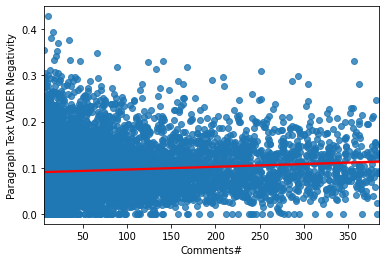

In [161]:
#using seaborn to visualize Comments # vs VADER Positivity
import seaborn as sns
ax = sns.regplot(x=filtereddf['Comments#'],y=filtereddf['negative'],data=filtereddf, fit_reg=True, line_kws={"color": "red"}) 
ax.set(xlabel='Comments#', ylabel='Paragraph Text VADER Negativity') 
plt.show()

In [ ]:
#all graphs for blog post are complete